# 📘 Model Training Notebook — AquaSafe

**Notebook:** `04_model_training.ipynb`

**Input:** `data/processed/train.csv`, `data/processed/test.csv`

**Output:** Trained models saved to `models/` directory

---

## 🎯 Objective

Train and evaluate multiple classification models on preprocessed water quality data.

### Models:
- Logistic Regression (baseline)
- Random Forest (ensemble)
- XGBoost (gradient boosting)

---
## Section 1: Imports

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from pathlib import Path

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns

from utils.config import DATA_DIR
from src.data_preprocessing.create_dataframe import create_dataframe

plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

print("✓ All imports successful")

✓ All imports successful


---
## Section 2: Load Data

In [2]:
TRAIN_PATH = os.path.join(DATA_DIR, "processed", "csv", "train.csv")
TEST_PATH = os.path.join(DATA_DIR, "processed", "csv", "test.csv")

train_df = create_dataframe(TRAIN_PATH)
test_df = create_dataframe(TEST_PATH)

print(f"✓ Train: {train_df.shape}")
print(f"✓ Test: {test_df.shape}")

✓ Train: (136, 93)
✓ Test: (35, 93)


In [3]:
TARGET_COL = "use_based_class"

X_train = train_df.drop(columns=[TARGET_COL])
y_train = train_df[TARGET_COL].values

X_test = test_df.drop(columns=[TARGET_COL])
y_test = test_df[TARGET_COL].values

print(f"✓ X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"✓ X_test: {X_test.shape}, y_test: {y_test.shape}")

✓ X_train: (136, 92), y_train: (136,)
✓ X_test: (35, 92), y_test: (35,)


In [4]:
MODELS_DIR = Path(DATA_DIR).parent / "models"
label_encoder = joblib.load(MODELS_DIR / "label_encoder.pkl")

print(f"✓ Label encoder loaded")
print(f"   Classes: {label_encoder.classes_}")

✓ Label encoder loaded
   Classes: ['A' 'B' 'C' 'E']


---
## Section 3: Model Configuration

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

rf_pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("model", RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42))
])

xgb_pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("model", XGBClassifier(
        objective="multi:softprob", eval_metric="mlogloss",
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ))
])

models = {
    "LogisticRegression": log_reg_pipeline,
    "RandomForest": rf_pipeline,
    "XGBoost": xgb_pipeline
}

scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "precision_macro": "precision_macro",
    "recall_macro": "recall_macro"
}

print("✓ Models and scoring configured")

✓ Models and scoring configured


---
## Section 4: Cross-Validation

In [6]:
print("="*80)
print("🔄 CROSS-VALIDATION")
print("="*80)

cv_results = {}

for name, pipeline in models.items():
    print(f"\nTraining: {name}...")
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = scores
    print(f"   ✓ Complete")

print("\n" + "="*80)
print("📊 CV RESULTS")
print("="*80)

for name, scores in cv_results.items():
    print(f"\n{name}:")
    print("-"*50)
    for metric in scoring.keys():
        mean = np.mean(scores[f'test_{metric}'])
        std = np.std(scores[f'test_{metric}'])
        print(f"   {metric:.<30} {mean:.4f} ± {std:.4f}")

🔄 CROSS-VALIDATION

Training: LogisticRegression...


/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-

   ✓ Complete

Training: RandomForest...


/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

   ✓ Complete

Training: XGBoost...
   ✓ Complete

📊 CV RESULTS

LogisticRegression:
--------------------------------------------------
   accuracy...................... 0.8979 ± 0.0561
   f1_macro...................... 0.6268 ± 0.1026
   precision_macro............... 0.6110 ± 0.1130
   recall_macro.................. 0.6951 ± 0.1208

RandomForest:
--------------------------------------------------
   accuracy...................... 0.9042 ± 0.0381
   f1_macro...................... 0.5413 ± 0.1495
   precision_macro............... 0.6075 ± 0.1188
   recall_macro.................. 0.5222 ± 0.1585

XGBoost:
--------------------------------------------------
   accuracy...................... 0.9190 ± 0.0433
   f1_macro...................... 0.6583 ± 0.1883
   precision_macro............... 0.6911 ± 0.1820
   recall_macro.................. 0.6588 ± 0.1829


/Users/rex/Documents/personal/AquaSafe/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


---
## Section 5: Test Set Evaluation

In [7]:
print("\n" + "="*80)
print("🎯 TEST SET EVALUATION")
print("="*80)

final_results = {}

for name, pipeline in models.items():
    print(f"\nTraining {name} on full train set...")
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)
    
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'recall_macro': recall_score(y_test, y_pred, average='macro', zero_division=0)
    }
    
    final_results[name] = {
        'pipeline': pipeline,
        'metrics': test_metrics,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"\n{name} Test Performance:")
    print("-"*50)
    for metric, value in test_metrics.items():
        print(f"   {metric:.<30} {value:.4f}")

print("\n" + "="*80)
print("✅ All models evaluated")
print("="*80)


🎯 TEST SET EVALUATION

Training LogisticRegression on full train set...

LogisticRegression Test Performance:
--------------------------------------------------
   accuracy...................... 0.9429
   f1_macro...................... 0.9083
   precision_macro............... 0.9839
   recall_macro.................. 0.8750

Training RandomForest on full train set...

RandomForest Test Performance:
--------------------------------------------------
   accuracy...................... 0.8571
   f1_macro...................... 0.4802
   precision_macro............... 0.4632
   recall_macro.................. 0.5000

Training XGBoost on full train set...

XGBoost Test Performance:
--------------------------------------------------
   accuracy...................... 0.9143
   f1_macro...................... 0.7583
   precision_macro............... 0.8589
   recall_macro.................. 0.8125

✅ All models evaluated


---
## Section 6: Confusion Matrices

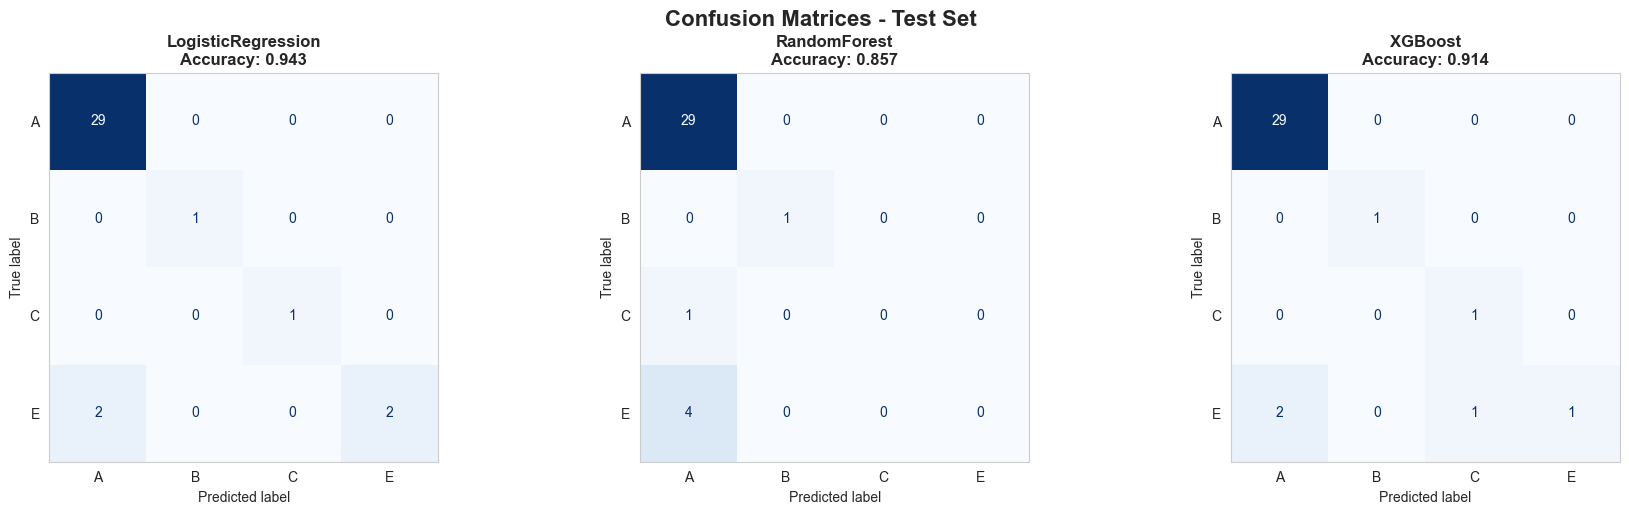

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, results) in enumerate(final_results.items()):
    cm = results['confusion_matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d', colorbar=False)
    axes[idx].set_title(f"{name}\nAccuracy: {results['metrics']['accuracy']:.3f}", fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.suptitle('Confusion Matrices - Test Set', fontsize=16, fontweight='bold', y=1.02)
plt.show()

---
## Section 7: Model Comparison

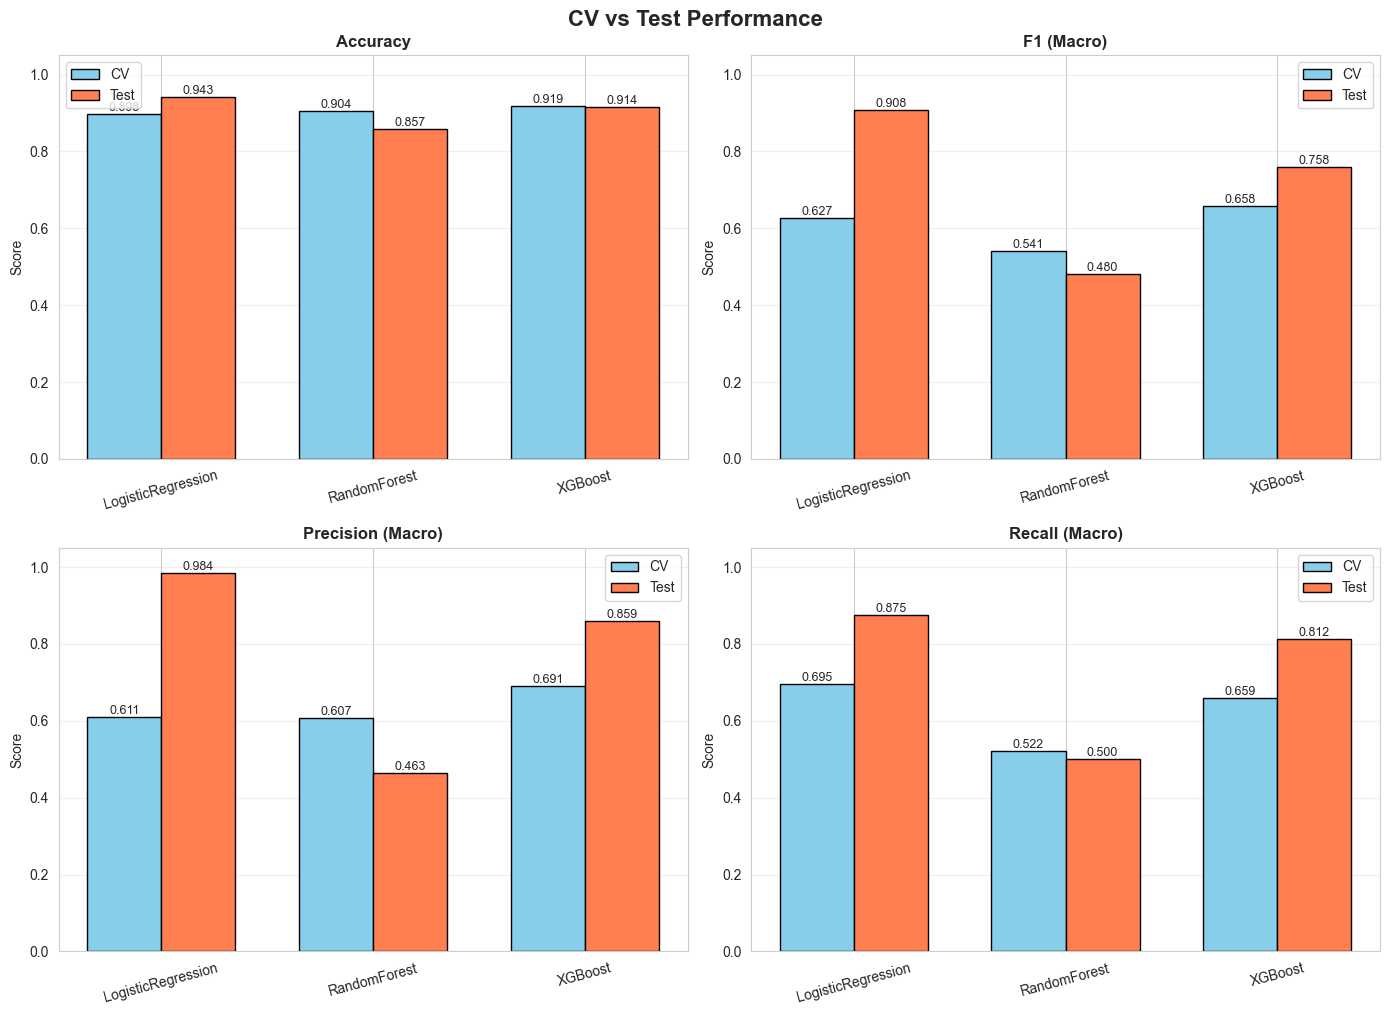

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

metrics_list = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
metric_labels = ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']

for idx, (metric, label) in enumerate(zip(metrics_list, metric_labels)):
    model_names = list(models.keys())
    x = np.arange(len(model_names))
    width = 0.35
    
    cv_scores = [np.mean(cv_results[name][f'test_{metric}']) for name in model_names]
    test_scores = [final_results[name]['metrics'][metric] for name in model_names]
    
    bars1 = axes[idx].bar(x - width/2, cv_scores, width, label='CV', color='skyblue', edgecolor='black')
    bars2 = axes[idx].bar(x + width/2, test_scores, width, label='Test', color='coral', edgecolor='black')
    
    axes[idx].set_ylabel('Score')
    axes[idx].set_title(label, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(model_names, rotation=15)
    axes[idx].legend()
    axes[idx].set_ylim(0, 1.05)
    axes[idx].grid(axis='y', alpha=0.3)
    
    for bar in bars1 + bars2:
        axes[idx].text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                      f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('CV vs Test Performance', fontsize=16, fontweight='bold', y=1.01)
plt.show()

---
## Section 8: Classification Reports

In [10]:
print("\n" + "="*80)
print("📋 CLASSIFICATION REPORTS")
print("="*80)

for name, results in final_results.items():
    print(f"\n{'='*60}")
    print(f"{name}")
    print('='*60)
    print(classification_report(
        y_test, results['y_pred'],
        target_names=[str(c) for c in label_encoder.classes_],
        digits=4, zero_division=0
    ))


📋 CLASSIFICATION REPORTS

LogisticRegression
              precision    recall  f1-score   support

           A     0.9355    1.0000    0.9667        29
           B     1.0000    1.0000    1.0000         1
           C     1.0000    1.0000    1.0000         1
           E     1.0000    0.5000    0.6667         4

    accuracy                         0.9429        35
   macro avg     0.9839    0.8750    0.9083        35
weighted avg     0.9465    0.9429    0.9343        35


RandomForest
              precision    recall  f1-score   support

           A     0.8529    1.0000    0.9206        29
           B     1.0000    1.0000    1.0000         1
           C     0.0000    0.0000    0.0000         1
           E     0.0000    0.0000    0.0000         4

    accuracy                         0.8571        35
   macro avg     0.4632    0.5000    0.4802        35
weighted avg     0.7353    0.8571    0.7914        35


XGBoost
              precision    recall  f1-score   support

      

---
## Section 9: Best Model & Feature Importance

In [11]:
best_model_name = max(final_results.keys(), key=lambda x: final_results[x]['metrics']['f1_macro'])

print("\n" + "="*80)
print(f"🏆 BEST MODEL: {best_model_name}")
print("="*80)
print(f"\nTest Metrics:")
for metric, value in final_results[best_model_name]['metrics'].items():
    print(f"   {metric}: {value:.4f}")


🏆 BEST MODEL: LogisticRegression

Test Metrics:
   accuracy: 0.9429
   f1_macro: 0.9083
   precision_macro: 0.9839
   recall_macro: 0.8750



📊 Feature Importance: RandomForest


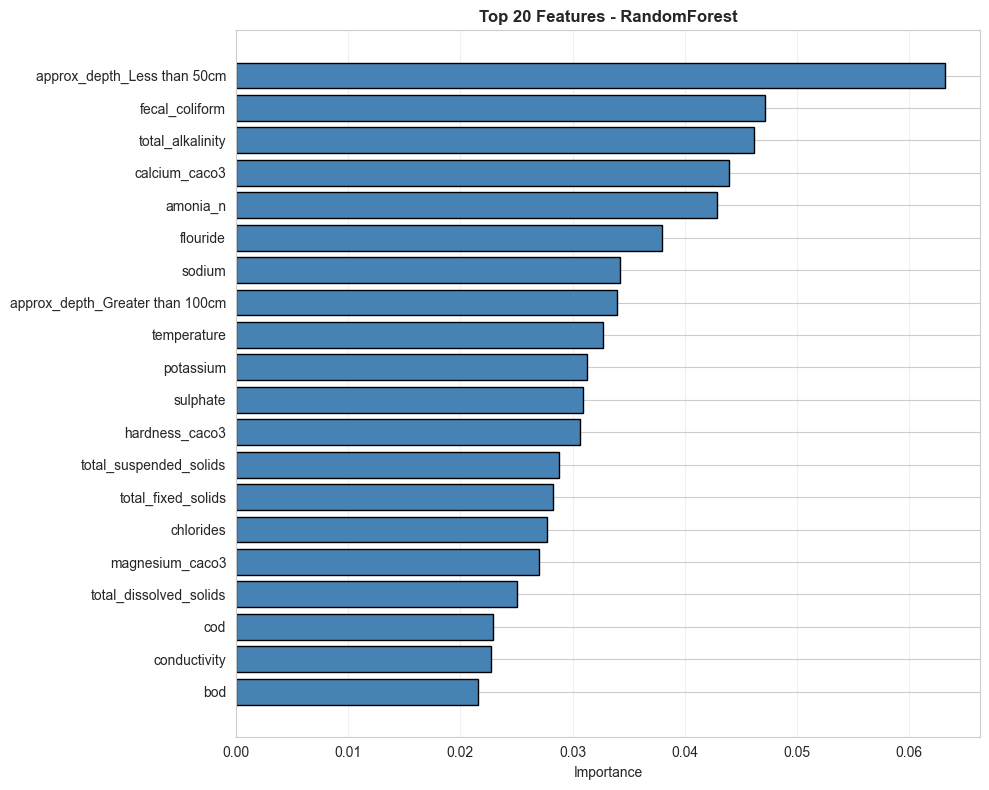


Top 10 Features:
                        Feature  Importance
    approx_depth_Less than 50cm    0.063154
                 fecal_coliform    0.047194
               total_alkalinity    0.046190
                  calcium_caco3    0.043951
                       amonia_n    0.042831
                       flouride    0.037966
                         sodium    0.034271
approx_depth_Greater than 100cm    0.033925
                    temperature    0.032704
                      potassium    0.031256

📊 Feature Importance: XGBoost


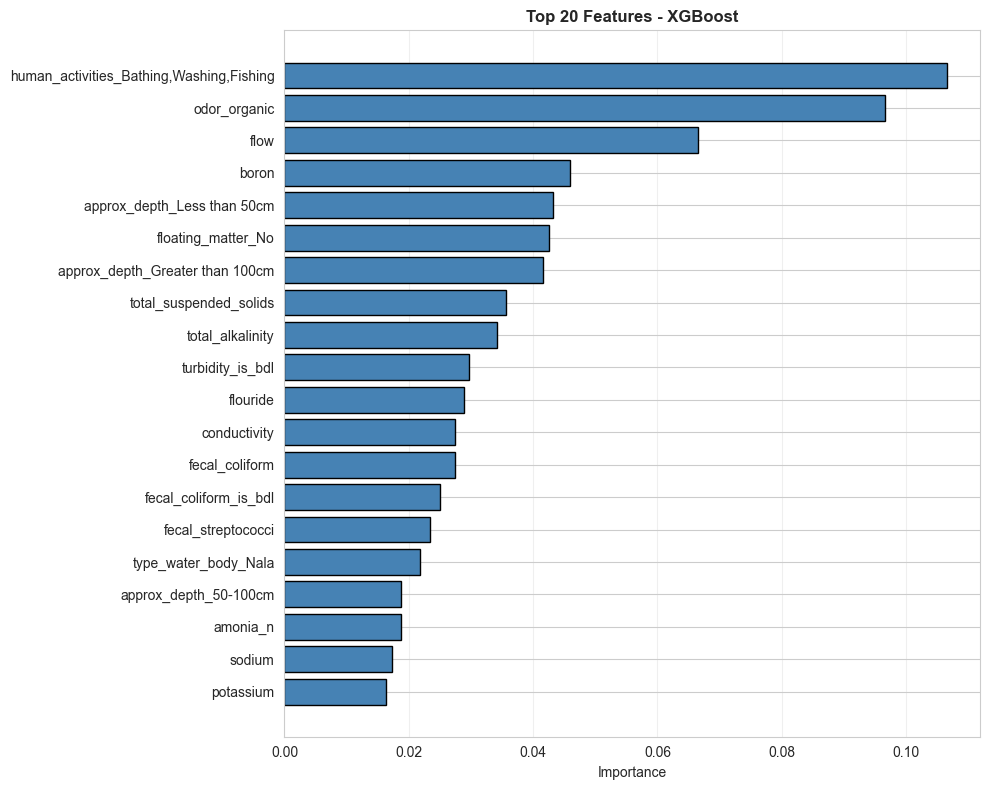


Top 10 Features:
                                 Feature  Importance
human_activities_Bathing,Washing,Fishing    0.106569
                            odor_organic    0.096614
                                    flow    0.066602
                                   boron    0.045897
             approx_depth_Less than 50cm    0.043201
                      floating_matter_No    0.042495
         approx_depth_Greater than 100cm    0.041569
                  total_suspended_solids    0.035710
                        total_alkalinity    0.034147
                        turbidity_is_bdl    0.029704


In [12]:
# Feature Importance for tree-based models
for name in ['RandomForest', 'XGBoost']:
    if name in final_results:
        print(f"\n📊 Feature Importance: {name}")
        
        model = final_results[name]['pipeline'].named_steps['model']
        importances = model.feature_importances_
        
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        fig, ax = plt.subplots(figsize=(10, 8))
        top_n = 20
        top = importance_df.head(top_n)
        
        ax.barh(range(top_n), top['Importance'].values, color='steelblue', edgecolor='black')
        ax.set_yticks(range(top_n))
        ax.set_yticklabels(top['Feature'].values)
        ax.invert_yaxis()
        ax.set_xlabel('Importance')
        ax.set_title(f'Top {top_n} Features - {name}', fontweight='bold')
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 10 Features:")
        print(importance_df.head(10).to_string(index=False))

---
## Section 10: Summary & Save Models

In [13]:
print("\n" + "="*80)
print("📊 MODEL COMPARISON SUMMARY")
print("="*80)

summary_rows = []
for name in models.keys():
    cv_f1 = np.mean(cv_results[name]['test_f1_macro'])
    test_f1 = final_results[name]['metrics']['f1_macro']
    gap = cv_f1 - test_f1
    
    summary_rows.append({
        'Model': name,
        'CV Accuracy': f"{np.mean(cv_results[name]['test_accuracy']):.4f}",
        'Test Accuracy': f"{final_results[name]['metrics']['accuracy']:.4f}",
        'CV F1': f"{cv_f1:.4f}",
        'Test F1': f"{test_f1:.4f}",
        'Gap': f"{gap:+.4f}"
    })

summary_df = pd.DataFrame(summary_rows)
print("\n" + summary_df.to_string(index=False))


📊 MODEL COMPARISON SUMMARY

             Model CV Accuracy Test Accuracy  CV F1 Test F1     Gap
LogisticRegression      0.8979        0.9429 0.6268  0.9083 -0.2816
      RandomForest      0.9042        0.8571 0.5413  0.4802 +0.0612
           XGBoost      0.9190        0.9143 0.6583  0.7583 -0.1001


In [14]:
print("\n💾 Saving models...")

for name, results in final_results.items():
    path = MODELS_DIR / f"{name.lower()}_pipeline.pkl"
    joblib.dump(results['pipeline'], path)
    print(f"   ✓ {path.name}")

with open(MODELS_DIR / "best_model_name.txt", 'w') as f:
    f.write(best_model_name)
print(f"   ✓ best_model_name.txt ('{best_model_name}')")

print(f"\n✅ All models saved to: {MODELS_DIR}")


💾 Saving models...
   ✓ logisticregression_pipeline.pkl
   ✓ randomforest_pipeline.pkl
   ✓ xgboost_pipeline.pkl
   ✓ best_model_name.txt ('LogisticRegression')

✅ All models saved to: /Users/rex/Documents/personal/AquaSafe/models


In [15]:
print("\n" + "="*80)
print("✅ MODEL TRAINING COMPLETE")
print("="*80)
print(f"""
Summary:
• Train samples: {len(X_train)}
• Test samples: {len(X_test)}
• Features: {X_train.shape[1]}
• Best Model: {best_model_name}
• Best Test F1: {final_results[best_model_name]['metrics']['f1_macro']:.4f}
""")
print("="*80)


✅ MODEL TRAINING COMPLETE

Summary:
• Train samples: 136
• Test samples: 35
• Features: 92
• Best Model: LogisticRegression
• Best Test F1: 0.9083

